In [3]:
##Parameter Selection
import gmpy2
from estimator import *
def Binom(n,m):
    nF=gmpy2.fac(n)
    mF=gmpy2.fac(m)
    nmF=gmpy2.fac(n-m)
    return int(nF/mF/nmF)
def findMLWEdeltaalpha(stddev, n, d, logq):
    ##load("https://github.com/weikengchen/lwe-estimator/blob/master/estimator.py")
    n = n * d
    q = 2^logq
    #stddev = sqrt(((2*nu+1)^2 - 1)/12)
    alpha = alphaf(sigmaf(stddev),q)
    set_verbose(1)
    L = estimate_lwe(n, alpha, q, reduction_cost_model=BKZ.enum)
    delta_enum1 = L['usvp']['delta_0'] 
    delta_enum2 = L['dec']['delta_0']  
    delta_enum3 = L['dual']['delta_0']  
    L = estimate_lwe(n, alpha, q, reduction_cost_model=BKZ.sieve)
    delta_sieve1 = L['usvp']['delta_0'] 
    delta_sieve2 = L['dec']['delta_0']  
    delta_sieve3 = L['dual']['delta_0']
    return max(delta_enum1,delta_enum2,delta_enum3,delta_sieve1,delta_sieve2,delta_sieve3)
def MLWED(init,d,sc,logq):
    mlwe =  init                            # dimension of the Module-LWE problem
    mlwe_hardness = 2
    while mlwe_hardness > 1.0045:           # increasing the mlwe dimension until MLWE provides ~ 128-bit security
        mlwe += 1                          
        mlwe_hardness = findMLWEdeltaalpha(sc,mlwe,d, logq)
    return mlwe

def findMSISdelta(B, n, d, logq):
	logC = log(B, 2)		
	logdelta = logC^2 / (4*n*d*logq)
	return 2^logdelta

def MSISD(n, Bound,d,logq):
    value_n_found = false                                                                     # Boolean for finding n
    while value_n_found == false:                                                             # searching for n
        n += 1                                                                                
        if findMSISdelta(Bound,n,d,logq) < 1.0045 and Bound < 2^logq:                         # until we reach ~ 128-bit security
            value_n_found = true  
    return n

d=128
p=2
beta=1024
eta=59
gamma=19
x=[3*i+1 for i in range(1,35)]###26 bad
def DCT():
    params=[]
    dcty=[]
    for N in x:
        K=N-(N-1)//3
        print("N,K",N,K)
        Bell=float(gmpy2.fac(N)/gmpy2.fac(N-K)*gmpy2.fac(N)/((gmpy2.fac(ceil(K/2)))**2)) ##lemma 3
        #print("ell infinity",Bell)
        #2.computing sc
        sc=sqrt(2)*Bell*sqrt(log(d,2))## 
        logs=ceil(log(sc,2))
        #print("log s",logs)
        #3.computing minimal q
        q=sc*beta*Bell*sqrt(2*d*K)*p ## in proof theorem 1
        logq=ceil(log(q,2))
        #print("log q",logq)
        m=MLWED(6,d,sc,logq)
        kappa=m+1
        #print("kappa",kappa)
        sn = gamma * eta* sc*sqrt(m)  
        Bn=8 * eta * sn * sqrt(2*m * d) 
        logBound=ceil(log(Bn,2))
        #print("log Bound",logBound)
        #4 computing msis dim
        if logq>logBound:
            n=MSISD(6, Bn,d,logq)
            #print("n",n)
            coun=0;
            while m<n+kappa:
                m=m+n+kappa
                sn = gamma * eta *sc*sqrt(m)
                Bn=8 * eta * sn * sqrt(2*m * d)
                logBound=ceil(log(Bn,2))
                if logq>logBound:
                    n=MSISD(6, Bn,d,logq)
                print("while counter ",coun)
                coun+=1
            params+=[[logs,logq,m,n,kappa,q]]
        else:
            logq=logBound+1
            m=MLWED(6,d,sc,logq)
            kappa=m+1
            #print("m",m)
            #print("log q",logq)
            sn = gamma * eta *sc*sqrt(m)  
            Bn=8 * eta * sn * sqrt(2*m * d) 
            logBound=ceil(log(Bn,2))
            #print("log Bound",logBound)
            if logq>logBound:
                n=MSISD(6, Bn,d,logq)
                #print("n",n)
                count=0;
                while m<n+kappa:
                    m=m+n+kappa
                    sn = gamma * eta *sc*sqrt(m)
                    Bn=8 * eta * sn * sqrt(2*m * d)
                    logBound=ceil(log(Bn,2))
                    if logq>logBound:
                        n=MSISD(6, Bn,d,logq)
                    print("2th while counter ",count)
                    count+=1
                params+=[[logs,logq,m,n,kappa,q]]
        dcty+=[logq*2*m*d//8]
        print("dcty", dcty)
        print("params", params)
    return dcty, params
#dcty,paras=DCT()
#print("dcty", dcty)##存储量
#print("params", params)
##N,K 61 41
#dcty [29952, 47520, 86592, 139776, 216576, 301888, 422592, 568000, 734720, 918016, 1109600, 1347840, 1641280, 1948000, 2272640, 2617472, 2996224, 3458432, 3897344, 4356352]
#params [[10, 36, 26, 11, 8, 679477248.0*sqrt(7)*sqrt(3)*sqrt(2)], [21, 55, 27, 13, 8, 4078562181120000.0*sqrt(7)*sqrt(5)*sqrt(2)], [34, 82, 33, 15, 10, (3.3300644496408576e+24)*sqrt(2)], [49, 112, 39, 16, 12, (1.2374993731726123e+33)*sqrt(7)*sqrt(2)], [65, 144, 47, 19, 15, (1.622691018062475e+42)*sqrt(11)*sqrt(7)*sqrt(2)], [82, 178, 53, 21, 17, (2.145069071924479e+52)*sqrt(13)*sqrt(7)*sqrt(2)], [99, 213, 62, 24, 20, (7.790640030215109e+62)*sqrt(15)*sqrt(7)*sqrt(2)], [118, 250, 71, 26, 23, (6.728828693504401e+73)*sqrt(17)*sqrt(7)*sqrt(2)], [136, 287, 80, 29, 26, (1.2400380940665008e+85)*sqrt(19)*sqrt(7)*sqrt(2)], [155, 326, 88, 32, 29, (4.4811354572170505e+96)*sqrt(21)*sqrt(7)*sqrt(2)], [175, 365, 95, 35, 31, (2.967898597437555e+108)*sqrt(23)*sqrt(7)*sqrt(2)], [195, 405, 104, 38, 34, (1.7044027973358017e+121)*sqrt(7)*sqrt(2)], [215, 446, 115, 41, 38, (1.9451693655582319e+133)*sqrt(7)*sqrt(3)*sqrt(2)], [236, 487, 125, 44, 41, (1.964361753490992e+145)*sqrt(29)*sqrt(7)*sqrt(2)], [257, 530, 134, 47, 44, (9.167504013820498e+157)*sqrt(31)*sqrt(7)*sqrt(2)], [279, 572, 143, 51, 47, (6.402596889704875e+170)*sqrt(33)*sqrt(7)*sqrt(2)], [300, 616, 152, 54, 50, (6.524427242299109e+183)*sqrt(35)*sqrt(7)*sqrt(2)], [322, 659, 164, 57, 54, (9.48663637027809e+196)*sqrt(37)*sqrt(7)*sqrt(2)], [344, 704, 173, 60, 57, (1.9295168454116022e+210)*sqrt(39)*sqrt(7)*sqrt(2)], [367, 748, 182, 64, 60, (5.393166054843383e+223)*sqrt(41)*sqrt(7)*sqrt(2)]]

In [10]:
##Fig 1
import matplotlib.pyplot as plt
import numpy as np
import gmpy2
def fig1():
    x=[3*i+1 for i in range(1,21)]##only consider N=61, otherwise, more time
    ##dcty stroage form the above parameter selection 
    y2=[29952, 47520, 86592, 139776, 216576, 301888, 422592, 568000, 734720, 918016, 1109600, 1347840, 1641280, 1948000, 2272640, 2617472, 2996224, 3458432, 3897344, 4356352]
    def sinhastor():
        nprime=412
        logqprime=4###存储单位设置为字节
        sinha=[]
        for N in x:
            T=N//3-1
            K=N-T
            sinha+=[Binom(N-1,K-1)*nprime*logqprime]
        return sinha
    y1=sinhastor()
    params=[[10, 36, 26, 11, 8, 679477248.0*sqrt(7)*sqrt(3)*sqrt(2)], [21, 55, 27, 13, 8, 4078562181120000.0*sqrt(7)*sqrt(5)*sqrt(2)], [34, 82, 33, 15, 10, (3.3300644496408576e+24)*sqrt(2)], [49, 112, 39, 16, 12, (1.2374993731726123e+33)*sqrt(7)*sqrt(2)], [65, 144, 47, 19, 15, (1.622691018062475e+42)*sqrt(11)*sqrt(7)*sqrt(2)], [82, 178, 53, 21, 17, (2.145069071924479e+52)*sqrt(13)*sqrt(7)*sqrt(2)], [99, 213, 62, 24, 20, (7.790640030215109e+62)*sqrt(15)*sqrt(7)*sqrt(2)], [118, 250, 71, 26, 23, (6.728828693504401e+73)*sqrt(17)*sqrt(7)*sqrt(2)], [136, 287, 80, 29, 26, (1.2400380940665008e+85)*sqrt(19)*sqrt(7)*sqrt(2)], [155, 326, 88, 32, 29, (4.4811354572170505e+96)*sqrt(21)*sqrt(7)*sqrt(2)], [175, 365, 95, 35, 31, (2.967898597437555e+108)*sqrt(23)*sqrt(7)*sqrt(2)], [195, 405, 104, 38, 34, (1.7044027973358017e+121)*sqrt(7)*sqrt(2)], [215, 446, 115, 41, 38, (1.9451693655582319e+133)*sqrt(7)*sqrt(3)*sqrt(2)], [236, 487, 125, 44, 41, (1.964361753490992e+145)*sqrt(29)*sqrt(7)*sqrt(2)], [257, 530, 134, 47, 44, (9.167504013820498e+157)*sqrt(31)*sqrt(7)*sqrt(2)], [279, 572, 143, 51, 47, (6.402596889704875e+170)*sqrt(33)*sqrt(7)*sqrt(2)], [300, 616, 152, 54, 50, (6.524427242299109e+183)*sqrt(35)*sqrt(7)*sqrt(2)], [322, 659, 164, 57, 54, (9.48663637027809e+196)*sqrt(37)*sqrt(7)*sqrt(2)], [344, 704, 173, 60, 57, (1.9295168454116022e+210)*sqrt(39)*sqrt(7)*sqrt(2)], [367, 748, 182, 64, 60, (5.393166054843383e+223)*sqrt(41)*sqrt(7)*sqrt(2)]]
    nset=[]
    mset=[]
    for item in params:
        nset+=[item[3]]
        mset+=[item[2]]
    pk=[]
    i=0
    for item in y2:
        pk+=[item/2/mset[i]*x[i]*(mset[i]+nset[i])]
        i+=1

    y1np=np.array(y1)
    y2np=np.array(y2)
    y3np=np.array(pk)
    print(y1np)
    print(y2np+y3np)
    y1=np.log(y1np)/np.log(2)
    y2=np.log(y2np)/np.log(2)
    y3=np.log(y3np)/np.log(2)
     # 创建图形
    plt.figure()

    # 绘制第一组数据
    plt.plot(x, y1, label='Private Key in [26]', marker='o')

    # 绘制第二组数据
    plt.plot(x, y2, label='Private Key in DCT', marker='s')

    plt.plot(x, y3, label='Public Key in DCT', marker='p')
    # 添加标题和轴标签
    #plt.title('Com')
    plt.xlabel('Number of parties in protocols')
    plt.ylabel('Size of the keys stored in logarithmic form')

    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()
#fig1()

In [15]:
##fig 2
import matplotlib.pyplot as plt
import numpy as np
import gmpy2
def Binom(n,m):
    nF=gmpy2.fac(n)
    mF=gmpy2.fac(m)
    nmF=gmpy2.fac(n-m)
    return int(nF/mF/nmF)
def sinhacomm():
    logqprime=3.5###存储单位设置为字节
    sinha=[]
    for N in x:
        T=N//3-1
        K=N-T
        sinha+=[Binom(N-1,K-1)*logqprime]
    return sinha
x = [3*i+1 for i in range(1,21)]##N

siny= sinhacomm()
#print(siny)
def fig2():
    params=[[10, 36, 26, 11, 8, 679477248.0*sqrt(7)*sqrt(3)*sqrt(2)], [21, 55, 27, 13, 8, 4078562181120000.0*sqrt(7)*sqrt(5)*sqrt(2)], [34, 82, 33, 15, 10, (3.3300644496408576e+24)*sqrt(2)], [49, 112, 39, 16, 12, (1.2374993731726123e+33)*sqrt(7)*sqrt(2)], [65, 144, 47, 19, 15, (1.622691018062475e+42)*sqrt(11)*sqrt(7)*sqrt(2)], [82, 178, 53, 21, 17, (2.145069071924479e+52)*sqrt(13)*sqrt(7)*sqrt(2)], [99, 213, 62, 24, 20, (7.790640030215109e+62)*sqrt(15)*sqrt(7)*sqrt(2)], [118, 250, 71, 26, 23, (6.728828693504401e+73)*sqrt(17)*sqrt(7)*sqrt(2)], [136, 287, 80, 29, 26, (1.2400380940665008e+85)*sqrt(19)*sqrt(7)*sqrt(2)], [155, 326, 88, 32, 29, (4.4811354572170505e+96)*sqrt(21)*sqrt(7)*sqrt(2)], [175, 365, 95, 35, 31, (2.967898597437555e+108)*sqrt(23)*sqrt(7)*sqrt(2)], [195, 405, 104, 38, 34, (1.7044027973358017e+121)*sqrt(7)*sqrt(2)], [215, 446, 115, 41, 38, (1.9451693655582319e+133)*sqrt(7)*sqrt(3)*sqrt(2)], [236, 487, 125, 44, 41, (1.964361753490992e+145)*sqrt(29)*sqrt(7)*sqrt(2)], [257, 530, 134, 47, 44, (9.167504013820498e+157)*sqrt(31)*sqrt(7)*sqrt(2)], [279, 572, 143, 51, 47, (6.402596889704875e+170)*sqrt(33)*sqrt(7)*sqrt(2)], [300, 616, 152, 54, 50, (6.524427242299109e+183)*sqrt(35)*sqrt(7)*sqrt(2)], [322, 659, 164, 57, 54, (9.48663637027809e+196)*sqrt(37)*sqrt(7)*sqrt(2)], [344, 704, 173, 60, 57, (1.9295168454116022e+210)*sqrt(39)*sqrt(7)*sqrt(2)], [367, 748, 182, 64, 60, (5.393166054843383e+223)*sqrt(41)*sqrt(7)*sqrt(2)]]
    nset=[]
    mset=[]
    qset=[]
    for item in params:
        nset+=[item[3]]
        mset+=[item[2]]
        qset+=[item[1]]
    dctcomm=[]
    i=0
    for item in nset:
        dctcomm+=[(item+2*mset[i]+2)*128*qset[i]]
        i+=1
    print(dctcomm)
    y1np=np.array(siny)
    y2np=np.array(dctcomm)
    y1=np.log(y1np)/np.log(2)
    y2=np.log(y2np)/np.log(2)
    plt.figure()

    # 绘制第一组数据
    plt.plot(x, y1, label='Scheme [26]', marker='o')

    # 绘制第二组数据
    plt.plot(x, y2, label='DCT Scheme', marker='s')
    plt.xlabel('Number of parties in protocols')
    plt.ylabel('Communication overhead in logarithmic form')

    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()
#fig2()    

    

In [18]:
#fig 3
import matplotlib.pyplot as plt
import numpy as np
import gmpy2

x = [3*i+1 for i in range(1,21)]##N

def Binom(n,m):
    nF=gmpy2.fac(n)
    mF=gmpy2.fac(m)
    nmF=gmpy2.fac(n-m)
    return int(nF/mF/nmF)
def sinhacomp():
    sinhaP=[]
    sinhaF=[]
    nprime=412
    for N in x:
        T=N//3-1
        K=N-T
        sinhaP+=[Binom(N-1,K-1)*nprime]
        sinhaF+=[K]
    return sinhaP,sinhaF
sinyP,sinyF=sinhacomp()
def fig3():
    params=[[10, 36, 26, 11, 8, 679477248.0*sqrt(7)*sqrt(3)*sqrt(2)], [21, 55, 27, 13, 8, 4078562181120000.0*sqrt(7)*sqrt(5)*sqrt(2)], [34, 82, 33, 15, 10, (3.3300644496408576e+24)*sqrt(2)], [49, 112, 39, 16, 12, (1.2374993731726123e+33)*sqrt(7)*sqrt(2)], [65, 144, 47, 19, 15, (1.622691018062475e+42)*sqrt(11)*sqrt(7)*sqrt(2)], [82, 178, 53, 21, 17, (2.145069071924479e+52)*sqrt(13)*sqrt(7)*sqrt(2)], [99, 213, 62, 24, 20, (7.790640030215109e+62)*sqrt(15)*sqrt(7)*sqrt(2)], [118, 250, 71, 26, 23, (6.728828693504401e+73)*sqrt(17)*sqrt(7)*sqrt(2)], [136, 287, 80, 29, 26, (1.2400380940665008e+85)*sqrt(19)*sqrt(7)*sqrt(2)], [155, 326, 88, 32, 29, (4.4811354572170505e+96)*sqrt(21)*sqrt(7)*sqrt(2)], [175, 365, 95, 35, 31, (2.967898597437555e+108)*sqrt(23)*sqrt(7)*sqrt(2)], [195, 405, 104, 38, 34, (1.7044027973358017e+121)*sqrt(7)*sqrt(2)], [215, 446, 115, 41, 38, (1.9451693655582319e+133)*sqrt(7)*sqrt(3)*sqrt(2)], [236, 487, 125, 44, 41, (1.964361753490992e+145)*sqrt(29)*sqrt(7)*sqrt(2)], [257, 530, 134, 47, 44, (9.167504013820498e+157)*sqrt(31)*sqrt(7)*sqrt(2)], [279, 572, 143, 51, 47, (6.402596889704875e+170)*sqrt(33)*sqrt(7)*sqrt(2)], [300, 616, 152, 54, 50, (6.524427242299109e+183)*sqrt(35)*sqrt(7)*sqrt(2)], [322, 659, 164, 57, 54, (9.48663637027809e+196)*sqrt(37)*sqrt(7)*sqrt(2)], [344, 704, 173, 60, 57, (1.9295168454116022e+210)*sqrt(39)*sqrt(7)*sqrt(2)], [367, 748, 182, 64, 60, (5.393166054843383e+223)*sqrt(41)*sqrt(7)*sqrt(2)]]
    nset=[]
    mset=[]
    kappa=[]
    K=[4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52]
    for item in params:
        nset+=[item[3]]
        mset+=[item[2]]
        kappa+=[item[4]]
    dctP=[]
    dctF=[]
    i=0
    for item in nset:
        dctP+=[128*7*(3*item*mset[i]+kappa[i]*(mset[i]+1)+2)]
        dctF+=[K[i]*128*7*(mset[i]*128+2*(item*mset[i]+item)+kappa[i]*(mset[i]+3)+1)+K[i]*128]
        i+=1
    return dctP,dctF

def plotfig3():
    dctP,dctF=fig3()
    print(sinyP,dctP)
    print(sinyF,dctF)
    y1np=np.array(sinyP)
    y2np=np.array(dctP)
    y1=np.log(y1np)/np.log(2)
    y2=np.log(y2np)/np.log(2)

    y3np=np.array(sinyF)
    y4np=np.array(dctF)
    y3=np.log(y3np)/np.log(2)
    y4=np.log(y4np)/np.log(2)

    plt.figure()

    # 绘制第一组数据
    plt.plot(x, y1, label='PartialEval in [26]', marker='o')

    # 绘制第二组数据
    plt.plot(x, y2, label='PartialEval in DCT', marker='s')

    plt.plot(x, y3, label='FinalEval in [26]', marker='D')
    plt.plot(x, y4, label='FinalEval in DCT', marker='^')

    plt.xlabel('Number of parties in protocols')
    plt.ylabel('Computation overhead in logarithmic form')

    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()
    print(y1np+y3np)
    print(y2np+y4np)
#plotfig3()

In [1]:
##DCT Test Code

import random
import sympy
import secrets
import gmpy2
import re
import numpy as np
import time
import hashlib
#random.seed(6)
#np.random.seed(6)
def alldct(num):
    def sample_discrete_gaussian(mean, std, dim, c=0.5):  
        """  
        生成一个符合离散高斯分布的随机向量。  

        :param mean: 均值（可以是标量或向量，如果是向量，则每个元素分别对应一个维度的均值）  
        :param std: 标准差（可以是标量或向量）  
        :param dim: 向量的维度  
        :param c: 截断参数，用于四舍五入或取整前的阈值调整  
        :return: 符合离散高斯分布的随机向量  
        """  
        # 如果mean和std是标量，则扩展为向量  
        if np.isscalar(mean):  
            mean = np.full(dim, mean)  
        if np.isscalar(std):  
            std = np.full(dim, std)  

        # 从连续高斯分布中采样  
        samples = np.random.normal(loc=mean, scale=std, size=dim)  
        #print("samples",list(samples))
        # 根据截断参数进行四舍五入  
        discrete_samples = np.round(samples / c) * c  
        return discrete_samples
    def myrandvec(size,prime):
        return [random.randint(0, prime) for i in range(size)]
    def generate_polynomial(secret, threshold, prime):  
        """  
        生成一个随机多项式，其中常数项为secret，且多项式的阶数为threshold-1  
        """  
        #coeffs = [secrets.randbelow(int(prime)) for _ in range(threshold - 1)] + [secret] 
        coeffs =myrandvec(threshold - 1,prime)+[secret] ##测试用
        return sympy.Poly(coeffs, sympy.symbols('x'))  

    def share_secret(secret, threshold, num_shares, prime):  
        """  
        分享秘密到多个份额  
        """  
        poly = generate_polynomial(secret, threshold, prime)  
        #print("poly",poly)
        shares = []  
        for i in range(1, num_shares + 1):  
            y = (poly.subs(sympy.symbols('x'), i)) % prime
            shares.append((i, y))  
        return shares  

    def recover_secret(shares, prime):  
        """  
        从足够的份额中恢复秘密  
        """  
        if len(shares) < 2:  
            raise ValueError("至少需要两个份额来恢复秘密")  

        x_values = [share[0] for share in shares]  
        y_values = [share[1] for share in shares]  

        # 使用拉格朗日插值法来恢复多项式  
        terms = []  
        for i, (x_i, y_i) in enumerate(shares):  
            p = 1  
            for j, (x_j, _) in enumerate(shares):  
                if i != j: 
                    p *= (sympy.symbols('x') - x_j) *mod_inverse(x_i - x_j,prime)  
            terms.append(y_i * p)  

        poly = sympy.Add(*terms)  
        #print("poly",poly)
        secret = poly.subs(sympy.symbols('x'), 0) % prime  
        return int(secret)  
    def recover_secret_special(ys, xs,N_Factor,Delta,q):  
        """  
        从足够的份额中恢复秘密  
        """  
        if len(ys) < 2:  
            raise ValueError("至少需要两个份额来恢复秘密")  

        x_values = xs  
        y_values = ys 
        shares=list(zip(xs, ys))
        #print("shares",shares)
        # 使用拉格朗日插值法来恢复多项式  
        terms = []  
        for i, (x_i, y_i) in enumerate(shares):  
            p = 1  
            for j, (x_j, _) in enumerate(shares):  
                if i != j: 
                    p *= (sympy.symbols('x') - x_j) /(x_i - x_j)  
            terms.append(y_i * N_Factor * p)  

        poly = sympy.Add(*terms)  
        #print("poly",poly)
        secret = poly.subs(sympy.symbols('x'), 0)  
        return int(secret%q) 
    def mydot(l1,l2):
        sum=0
        for i in range(len(l1)):
            sum+=int(l1[i])*int(l2[i])
        return sum

    def mymod(n,p):
        if (n % p) <p//2:
            return n%p
        return n%p-p
    def myvecm(scal,vec):
        res=[]
        for i in range(len(vec)):
            res+=[int(int(vec[i])*scal)]
        return res
    def myveca(vecl,vecr):
        res=[]
        for i in range(len(vecl)):
            res+=[int(vecl[i])+int(vecr[i])]
        return res
    def myvecmod(q,vec):
        res=[]
        for i in range(len(vec)):
            res+=[int(vec[i])%q]
        return res
    def SamplePoly(d,q):
        coef=[random.randint(0, q-1) for i in range(d)]
        f=coef[d-1]*x**(d-1)
        for i in range(1,d):
            f+=coef[d-1-i]*x**(d-1-i)
        return f
    def SamplePolyCo(d,coef):
        #print("coef[d-1]",coef[d-1])
        coef=ChangeType(coef)
        f=coef[d-1]*x**(d-1)
        for i in range(1,d):
            f+=coef[d-1-i]*x**(d-1-i)
        return f
    def GetCoef(d,qq):
        strf="{}".format(qq)
        strfs=strf.split("+")
        coefs=[0]*d
        pattern=r'\d+'
        for item in strfs:
            #两个数字或者一个数字
            if "*" in item and "^" in item:
                sa,sb=re.findall(pattern,item)
                coefs[int(sb)]=int(sa)
            elif "^" in item:
                sb=re.findall(pattern,item)
                coefs[int(sb[0])]=1
            elif "*" in item:
                sa=re.findall(pattern,item)
                coefs[1]=int(sa[0])
            else:
                sa=re.findall(pattern,item)
                if sa!=[]:
                    coefs[0]=int(sa[0])##常数项
                else:
                    coefs[1]=1##一次项且系数为1
        return coefs
    def ChangeType(xa):
        res=[]
        for item in xa:
            res+=[int(item)]
        return res
    def o2f(vec):
        sum=0
        for it in vec:
            sum+=it*it
        return int(math.sqrt(sum))
    def oinf(vec):
        res=0
        for it in vec:
            v=abs(it)
            if v>res:
                res=v
        return res
    def CheckEqu(v1,v2):
        lv1=len(v1)
        lv2=len(v2)
        if lv1!=lv2:
            return false
        else:
            for i in range(lv1):
                if v1[i]!=v2[i]:
                    return false
        return true

    def SampleMatrix(n,m,d,q):
        matrix=[]
        for i in range(n):
            irow=[]
            for j in range(m):
                irow+=[SamplePoly(d,q)]
            matrix+=[irow]
        return matrix
    def SampleGas(d,m,s):
        res=[]
        for i in range(m):
            tmp=sample_discrete_gaussian(0, s, d, c=1)
            tmppoly=SamplePolyCo(d,tmp)
            res+=[tmppoly]
        return res
    def Hashf(stri,m,d,q):
        sha256_hash = hashlib.sha256()
        sha256_hash.update(stri.encode('utf-8'))
        col=[]
        for i in range(m):
            row=[]
            for j in range(d):
                index=int(i*d+j)
                sha256_hash.update(index.to_bytes((index.bit_length() + 7) // 8, byteorder='big'))
                hash_hex=sha256_hash.hexdigest()
                val=int(hash_hex[:20], 16)
                row+=[val%q]
            col+=[SamplePolyCo(d,row)]
        return col
    def HashC(vecx,d,kappa):##LPN22##输入是多个多项式
        stri=""
        for item in vecx:
            for po in item:
                stri+="{}".format(po)
        sha256_hash = hashlib.sha256()
        sha256_hash.update(stri.encode('utf-8'))
        hd=d//2
        coef=[]
        for j in range(hd):
            sha256_hash.update(j.to_bytes((j.bit_length() + 7) // 8, byteorder='big'))
            hash_hex=sha256_hash.hexdigest()
            val=int(hash_hex[:8], 16)
            coef+=[val%kappa]
        coef=coef+[0]+[-i for i in coef[1:]][::-1]
        f=coef[d-1]*x**(d-1)
        for i in range(1,d):
            f+=coef[d-1-i]*x**(d-1-i)
        return f###采用hashC时发现需要有负数存在,然后在sage表示中，用的是0,q。因此负数非常大
    def MatrixVectorMul(A,b,n,m,d,q):
        res=[SamplePolyCo(d,[0]*d) for i in range(n)]
        for i in range(n):
            for j in range(m):
                res[i]+=A[i][j]*b[j]
        return res
    def Vectoradd(a,b):
        ln=len(a)
        res=[]
        for i in range(ln):
            res+=[a[i]+b[i]]
        return res
    def Vectorsub(a,b):
        ln=len(a)
        res=[]
        for i in range(ln):
            res+=[a[i]-b[i]]
        return res
    def Vectormul(a,b):
        ln=len(a)
        res=SamplePolyCo(d,[0]*d)
        for i in range(ln):
            res+=a[i]*b[i]
        return res
    def VecInner(a,b,q):
        acoef=[]
        bcoef=[]
        for ai in a:
            acoef+=GetCoef(d,ai)
        for bi in b:
            bcoef+=GetCoef(d,bi)
        res=0
        ln=len(acoef)
        for i in range(ln):
            res+=mymod(acoef[i],q)*mymod(bcoef[i],q)
        return res 

    def Shareing(veck,kappa,d,N,T,q):
        veckUc=[[[0]*d for j in range(kappa)] for i in range(N)]
        i=0
        for item in veck:
            itemc=GetCoef(d,item)
            j=0
            for coef in itemc:
                tmp=share_secret(coef, T, N, q)
                for k in range(N):
                    #print("k, i, j ",k,i,j)
                    veckUc[k][i][j]=tmp[k][1]
                j=j+1
            i=i+1
        vecU=[[0 for j in range(kappa)] for i in range(N)]

        j=0
        for item in veckUc:
            k=0
            for itemm in item:


                vecU[j][k]=SamplePolyCo(d,itemm)

                k=k+1
            j=j+1
        return vecU
    def Reg1(vecz,vecv,s,M,q):
        u=random.random()
        zv=VecInner(vecz,vecv,q)
        #print(zv,type(zv))
        vv=VecInner(vecv,vecv,q)
        #print(vv,type(vv))
        #print(s,type(s))
        ei=(-2*zv+vv)/(2*s**2)
        #print("ei",ei)
        rv=1/M*math.e**ei
        #print(rv)
        if u>rv:
            return 1
        else:
            return 0

    def GenPi(bfA,bfB,hx,vecru,vecrup,kappa,m,d,stdev,s,Bc):
        pi=[]
        iter=10*int(M+1)
        for i in range(iter):
            vecy1=SampleGas(d,m,stdev)
            vecy2=SampleGas(d,m,stdev)
            vecw1=MatrixVectorMul(bfA,vecy1,n,m,d,q)
            vecw2=MatrixVectorMul(bfA,vecy2,n,m,d,q)
            vecv1=MatrixVectorMul(bfB,vecy1,kappa,m,d,q)
            vecv11=Vectormul(vecv1,hx)
            vecv2=vecy2[0]
            vecv=vecv11-vecv2
            c=HashC([vecw1,vecw2,[vecv]],d,Bc)
            v1=[c*i for i in vecru]
            z1=Vectoradd(v1,vecy1)
            v2=[c*i for i in vecrup]
            z2=Vectoradd(v2,vecy2)
            if Reg1(z1,v1,stdev,M,q)==0 and Reg1(z2,v2,stdev,M,q)==0:
                pi+=[c,z1,z2]
                #print("pi",len(pi))
                break
        return pi
    def CheckPi(prof,pku,resu,stdev,kappa,m,d,q,bfA,bfB,hx,Bc):
        c=prof[0]
        z1=prof[1]
        z2=prof[2]
        tA=pku[0]
        tAp=resu[0]
        tB=pku[1]
        tb=resu[1]
        normz1=VecInner(z1,z1,q)
        normz2=VecInner(z2,z2,q)
        rv=int(stdev**2*2*m*d+1)
        if normz1> rv or normz2>rv:
            return false
        Az1=MatrixVectorMul(bfA,z1,n,m,d,q)
        ctA=[c*i for i in tA]
        vecw1p=Vectorsub(Az1,ctA)
        Az2=MatrixVectorMul(bfA,z2,n,m,d,q)
        ctAp=[c*i for i in tAp]
        vecw2p=Vectorsub(Az2,ctAp)
        Bz1=MatrixVectorMul(bfB,z1,kappa,m,d,q)
        vecvp1=Vectormul(Bz1,hx)
        vecvp2=z2[0]
        vecvp3=Vectormul(tB,hx)
        vecvp3f=vecvp3-tb
        vecvp=vecvp1-vecvp2-c*vecvp3f
        cp=HashC([vecw1p,vecw2p,[vecvp]],d,Bc)
        if cp!=c:
            print(cp)
            print(c)
            return false
        return true
    def Findq(logq):
        q=gmpy2.next_prime(2**logq)
        while q%8!=5:
            q=gmpy2.next_prime(q+2)
        return q
    def setparams(i):
        params=[[10, 36, 26, 11, 8, 679477248.0*sqrt(7)*sqrt(3)*sqrt(2)], [21, 55, 27, 13, 8, 4078562181120000.0*sqrt(7)*sqrt(5)*sqrt(2)], [34, 82, 33, 15, 10, (3.3300644496408576e+24)*sqrt(2)], [49, 112, 39, 16, 12, (1.2374993731726123e+33)*sqrt(7)*sqrt(2)], [65, 144, 47, 19, 15, (1.622691018062475e+42)*sqrt(11)*sqrt(7)*sqrt(2)], [82, 178, 53, 21, 17, (2.145069071924479e+52)*sqrt(13)*sqrt(7)*sqrt(2)], [99, 213, 62, 24, 20, (7.790640030215109e+62)*sqrt(15)*sqrt(7)*sqrt(2)], [118, 250, 71, 26, 23, (6.728828693504401e+73)*sqrt(17)*sqrt(7)*sqrt(2)], [136, 287, 80, 29, 26, (1.2400380940665008e+85)*sqrt(19)*sqrt(7)*sqrt(2)], [155, 326, 88, 32, 29, (4.4811354572170505e+96)*sqrt(21)*sqrt(7)*sqrt(2)], [175, 365, 95, 35, 31, (2.967898597437555e+108)*sqrt(23)*sqrt(7)*sqrt(2)], [195, 405, 104, 38, 34, (1.7044027973358017e+121)*sqrt(7)*sqrt(2)], [215, 446, 115, 41, 38, (1.9451693655582319e+133)*sqrt(7)*sqrt(3)*sqrt(2)], [236, 487, 125, 44, 41, (1.964361753490992e+145)*sqrt(29)*sqrt(7)*sqrt(2)], [257, 530, 134, 47, 44, (9.167504013820498e+157)*sqrt(31)*sqrt(7)*sqrt(2)], [279, 572, 143, 51, 47, (6.402596889704875e+170)*sqrt(33)*sqrt(7)*sqrt(2)], [300, 616, 152, 54, 50, (6.524427242299109e+183)*sqrt(35)*sqrt(7)*sqrt(2)], [322, 659, 164, 57, 54, (9.48663637027809e+196)*sqrt(37)*sqrt(7)*sqrt(2)], [344, 704, 173, 60, 57, (1.9295168454116022e+210)*sqrt(39)*sqrt(7)*sqrt(2)], [367, 748, 182, 64, 60, (5.393166054843383e+223)*sqrt(41)*sqrt(7)*sqrt(2)]]
        return [3*i+1,2*i+1,params[i-1][0],params[i-1][1],params[i-1][2],params[i-1][3],params[i-1][4]]
    ##dprf ring version
    para=setparams(num)
    N=para[0]
    T=para[1]
    m=para[4]
    n=para[5]
    kappa=para[6]
    s=2**para[2]*1.0##sc
    q=Findq(para[3])
    F=N-T
    d=128
    p=2
    beta=1024###结果正确的概率为1-1/correct_prob
    Bc=2
    ##用于零知识
    gamma=19
    eta=59
    sn=gamma * eta *math.sqrt(m)*s
    M=math.e**(14/gamma+1/(2*gamma**2))##Reg_1算法预期迭代次数
    N_Factor=int(gmpy2.fac(N))
    F_Factor=int(gmpy2.fac(F))
    ##模多项式环的表示
    R.<xx>=Zmod(q)[]
    f=R.cyclotomic_polynomial(2*d)
    S = R.quotient(f, 'x')
    x = S.gen()
    start_time = time.time()
    ##Setup
    bfA=SampleMatrix(n,m,d,q)
    bfB=SampleMatrix(kappa,m,d,q)

    end_time_1 = time.time()
    ##KeySharing
    veck=SampleMatrix(1,kappa,d,q)
    veck=veck[0]##矩阵表示改为向量表示

    veckU=Shareing(veck,kappa,d,N,T,q)
    vecrU=[]
    pkU=[]
    for i in range(N):
        vecru=SampleGas(d,m,s)##r1u
        vecrU+=[vecru]
        vectAu=MatrixVectorMul(bfA,vecru,n,m,d,q)
        bfBvecru=MatrixVectorMul(bfB,vecru,kappa,m,d,q)
        vectBu=Vectoradd(bfBvecru,veckU[i])
        pkU+=[[vectAu,vectBu]]


    end_time_2 = time.time()
    #print(len(pkU),end_time_2-end_time_1,end_time_1-start_time)
    ##PEval
    vecx="a random string as input a"
    hx=Hashf(vecx,kappa,d,q)
    piU=[]
    resU=[]
    timezk=0
    for i in range(N):
        vecrpu=SampleGas(d,m,s)##r2u
        brpu=vecrpu[0]
        hxku=Vectormul(hx,veckU[i])
        tbu=brpu+hxku
        zk_time_1 = time.time()
        vectpAu=MatrixVectorMul(bfA,vecrpu,n,m,d,q)
        piU+=[GenPi(bfA,bfB,hx,vecrU[i],vecrpu,kappa,m,d,sn,s,Bc)]
        zk_time_2 = time.time()
        timezk+=zk_time_2-zk_time_1
        resU+=[[vectpAu,tbu]]###tbu是一个多项式


    end_time_3 = time.time()
    ##FinalEval
    V=[i for i in range(T)]
    timevzk=0
    zk_time_1 = time.time()
    for i in V:
        if CheckPi(piU[i],pkU[i],resU[i],sn,kappa,m,d,q,bfA,bfB,hx,Bc)==false:
            print("ZKError")
    zk_time_2 = time.time()
    timevzk=zk_time_2-zk_time_1
    Vuse=list(np.array(V)+1)
    zi1_c=[]
    for j in range(T):
        zi1_c+=[GetCoef(d,resU[V[j]][1])]
    #print("[zi1_c[j][i]",zi1_c[0][0])
    z1_c=[]
    for i in range(d):
        z1_c+=[recover_secret_special([zi1_c[j][i] for j in range(T)], Vuse,N_Factor,1,q)]
    z1=SamplePolyCo(d,z1_c)


    g0c=GetCoef(d,z1)
    barg0=g0c[0]
    #print(barg0)
    #print(mymod(barg0,q))
    feres=int(barg0/(q/p))
    end_time_4 = time.time()

    ##Eval
    hxk=Vectormul(hx,veck)
    gpc=GetCoef(d,hxk)
    tmpf=N_Factor*gpc[0]%q
    #print(tmpf)##这里不涉及高斯噪声，所以不用计算mymod
    bargp0=int(tmpf/(q/p))
    end_time_5 = time.time()
    print(feres)
    print(bargp0)
    print(N, end_time_5-end_time_4,end_time_4-end_time_3,end_time_3-end_time_2,end_time_2-end_time_1,end_time_1-start_time,timezk,timevzk)
for i in range(1,21):##14
    alldct(i)
#1
#1
#43 0.04757499694824219 505.1404392719269 4158.447826385498 645.7535734176636 348.2727017402649 4028.076553106308 477.71970295906067

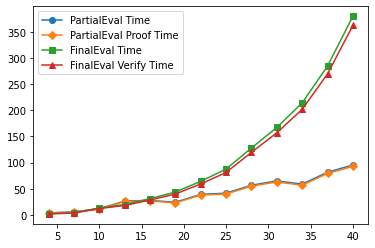

[3.750825166702271 5.77564682279314 11.75460505485535 26.56994476685157
 27.6690215319395 24.15945928975155 39.2618755210530 41.55211883544922
 56.69108441897801 65.01067483040594 58.84223829297459 81.59098922884142
 95.38930100798607]
[3.415141999721527 5.433169330869402 11.00807070732117 25.6930795999674
 26.6085464805365 22.9756807528044 37.8541040962393 39.9494222450256
 54.88005460160119 62.99526345345282 56.66664459424860 79.1862522009257
 92.7374536633492]
y2 [0.586453974246979 0.587871176855905 1.32403459548950 1.526672326601469
 1.94731789827347 2.298147038409584 2.91822721741416 3.50674427032471 NaN
 NaN NaN NaN NaN]
y1 [0.3356831669807435 0.342477491923741 0.7465343475341800 0.876865166884203
 1.06047505140304 1.18377853694715 1.40777142481370 1.60269659042358
 1.811029817376818 2.015411376953123 2.175593698725983 2.40473702791574
 2.65184734463692]


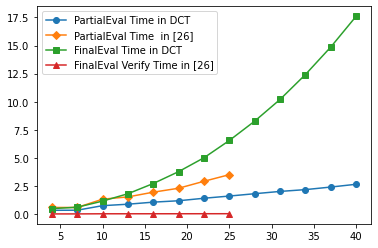

In [3]:
##fig 4-5
import matplotlib.pyplot as plt
import numpy as np
import gmpy2


def dct_time():
    N = [3*i+1 for i in range(1,14)]
    y1=np.array(dctPEvalTime)
    y3=np.array(dctFEvalTime)
    y2=np.array(dctPEvalProofTime)
    y4=np.array(dctFEvalVerTime)
    plt.figure()

    # 绘制第一组数据
    plt.plot(N, y1, label='PartialEval Time', marker='o')
    plt.plot(N, y2, label='PartialEval Proof Time', marker='D')
    # 绘制第二组数据
    plt.plot(N, y3, label='FinalEval Time', marker='s')

    plt.plot(N, y4, label='FinalEval Verify Time', marker='^')
    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()
    print(y1)
    print(y2)
  
dctdata=[[0.012675046920776367, 2.345815896987915, 15.003300666809082, 3.7620348930358887, 6.32037878036499, 13.660567998886108, 1.861280918121338], [0.013455867767333984, 4.115098237991333, 40.429527759552, 6.7768614292144775, 7.148405313491821, 38.032185316085815, 3.508633852005005], [0.024623394012451172, 13.24034595489502, 117.54605054855347, 19.99691367149353, 18.339499950408936, 110.08070707321167, 12.087413311004639], [0.02503657341003418, 19.846740245819092, 345.40928196907043, 31.446401119232178, 24.29168701171875, 334.0100347995758, 18.039377212524414], [0.026388168334960938, 31.15708637237549, 442.7043445110321, 49.37471008300781, 35.7051739692688, 425.7367436885834, 28.438904523849487], [0.027243614196777344, 43.664793729782104, 459.02972650527954, 66.59174704551697, 44.86540198326111, 436.5379343032837, 39.8885235786438], [0.029175519943237305, 64.20099878311157, 863.7612614631653, 100.36244058609009, 61.90939807891846, 832.7902901172638, 59.1902391910553], [0.03086090087890625, 87.66860675811768, 1038.8029708862305, 131.1155526638031, 78.99230217933655, 998.7355561256409, 81.1183762550354], [0.033158063888549805, 127.96458292007446, 1587.3503637313843, 187.902334690094, 100.03764271736145, 1536.6415288448334, 119.69171071052551], [0.03606152534484863, 167.1884160041809, 2015.3309197425842, 237.67286348342896, 124.16405701637268, 1952.8531670570374, 156.98482203483582], [0.037441253662109375, 214.29782795906067, 2000.6361019611359, 292.4494607448578, 144.51657247543335, 1926.6659162044525, 201.87607741355896], [0.03966808319091797, 284.6470437049866, 3018.8666014671326, 381.4409031867981, 174.82061624526978, 2929.89133143425, 269.7752158641815], [0.04262590408325195, 379.9230854511261, 3815.5720403194427, 494.11913990974426, 210.59150958061218, 3709.498146533966, 362.31266593933105]]
dctPEvalTime=[]
dctPEvalProofTime=[]
dctFEvalTime=[]
dctFEvalVerTime=[]
for i in range(13):
    dctPEvalTime+=[dctdata[i][2]/((i+1)*3+1)]##单个用户的PEval时间
    dctPEvalProofTime+=[dctdata[i][5]/((i+1)*3+1)]##单个用户的NIZK PROOF时间
    dctFEvalTime+=[dctdata[i][1]]##单个用户的FinalEval时间
    dctFEvalVerTime+=[dctdata[i][6]]
acnsdata=[
    [0.0,0.001994609832763672, 0.004985809326171875 ],
    [0.0,0.006968021392822266, 0.044893503189086914 ],
    [0.0,0.04787135124206543, 0.33214521408081055],
    [0.0,0.3730356693267822, 2.554131507873535],
    [0.0,2.738677501678467, 19.816972732543945],
    [0.0009975433349609375,20.957959413528442, 147.63294339179993],
    [0.004975318908691406,155.025493144989, 1089.2371666431427],
    [0.032921552658081055,1159.8864822387695, 7935.850035190582]
]

def fig5():
    acnsPEvalTime=[]
    acnsFEvalTime=[]
    for i in range(8):
        acnsPEvalTime+=[dctdata[i][1]/((i+1)*3+1)]##单个用户的PEval时间
        acnsFEvalTime+=[dctdata[i][0]]##单个用户的NIZK PROOF时间
    for i in range(8,13):
        acnsPEvalTime+=[NaN]
        acnsFEvalTime+=[NaN]
    N = [3*i+1 for i in range(1,14)]
    y1=np.array(dctPEvalTime)
    y3=np.array(dctFEvalTime)
    y2=np.array(dctPEvalProofTime)
    y4=np.array(dctFEvalVerTime)
    y1=y1-y2
    y3=y3-y4
    y2=np.array(acnsPEvalTime)
    y4=np.array(acnsFEvalTime)
    print("y2",y2)
    print("y1",y1)
    plt.figure()

        # 绘制第一组数据
    plt.plot(N, y1, label='PartialEval Time in DCT', marker='o')
    plt.plot(N, y2, label='PartialEval Time  in [26]', marker='D')
    # 绘制第二组数据
    plt.plot(N, y3, label='FinalEval Time in DCT', marker='s')

    plt.plot(N, y4, label='FinalEval Verify Time in [26]', marker='^')
    # 添加图例
    plt.legend()

    # 显示图形
    plt.show()
#dct_time() 
#fig5()

In [ ]:
## Sinha et al. ACNS 2024
from math import factorial
import random
import numpy as np
import hashlib
import time
def ACNSALL(num):
    def comb(n, k):
        if k < 0 or k > n:
            return 0
        return factorial(n) // (factorial(k) * factorial(n - k))

    def find_parties(gid, t, T):
        """
        根据 gid、t 和 T 找到对应的元素集合。

        参数:
        gid (int): 组的 ID。
        t (int): 需要选择的元素个数。
        T (int): 总元素个数。

        返回:
        list: 包含选中的元素的列表。
        """
        pt = []  # 用于存储结果
        mem = 0  # 已选元素个数

        for i in range(1, T):
            # 计算组合数 C(T - i, t - mem - 1)
            tmp = comb(T - i, t - mem - 1)

            if gid > tmp:
                gid -= tmp  # 跳过当前元素
            else:
                pt.append(i)  # 将当前元素加入结果集
                mem += 1  # 更新已选元素个数

            # 如果剩余元素个数加上已选元素个数等于 t，则将剩余元素全部加入结果集
            if mem + (T - i) == t:
                for j in range(i + 1, T + 1):
                    pt.append(j)
                break

        return pt
    def find_group_id(parties, t, T):
        """
        根据选中的元素集合 parties，计算其组 ID。

        参数:
        parties (list): 选中的元素集合，例如 [1, 3, 5]。
        t (int): 需要选择的元素个数。
        T (int): 总元素个数。

        返回:
        int: 组 ID。
        """
        mem = 0  # 已选元素个数
        group_count = 1  # 组 ID，初始值为 1

        for i in range(1, T + 1):
            if i in parties:
                mem += 1  # 当前元素在 parties 中，增加已选元素个数
            else:
                # 当前元素不在 parties 中，计算组合数并累加到 group_count
                group_count += comb(T - i, t - mem - 1)

            # 如果已选元素个数等于 t，则停止遍历
            if mem == t:
                break

        return group_count

    def share_secret_tTL(t, T, key, n,q):
        """
        实现共享密钥的逻辑。

        参数:
        t (int): 阈值。
        T (int): 总参与方数。
        key (list): 密钥，长度为 n。
        n (int): 密钥的长度。

        返回:
        dict: 共享密钥仓库，格式为 shared_key_repo_tT[party][gid] = 密钥向量。
        """
        group_count = comb(T, t)  # 计算组合数 C(T, t)
        shared_key_repo_tT = {}  # 共享密钥仓库

        for gid in range(1, group_count + 1):
            # 找到当前组 ID 对应的参与方集合
            parties = find_parties(gid, t, T)

            # 将 key 复制到 shared_key_repo_tT[parties[0]][gid]
            shared_key_repo_tT[parties[0]][gid] = key.copy()

            # 对于其他参与方，生成随机向量并累加到 shared_key_repo_tT[parties[0]][gid]
            for i in range(1, t):
                shared_key_repo_tT[parties[i]][gid] = [random.randint(0, q) for _ in range(n)]  # 随机生成向量
                for j in range(n):
                    shared_key_repo_tT[parties[0]][gid][j] += shared_key_repo_tT[parties[i]][gid][j]%q

        return shared_key_repo_tT
    def Hashf(stri,q,n):
            sha256_hash = hashlib.sha256()
            sha256_hash.update(stri.encode('utf-8'))
            res=[]
            for i in range(n):
                index=int(i)
                sha256_hash.update(index.to_bytes((index.bit_length() + 7) // 8, byteorder='big'))
                hash_hex=sha256_hash.hexdigest()
                val=int(hash_hex[:20], 16)
                res+=[val%q]
            return res
   
    N=3*num+1
    K=2*num+1
    n=412
    q=4294967296
    q1=268435456
    p=2
    ###Sharing
    start_time=time.time()
    veck=np.random.randint(0, q, size=(1, n))[0]

    sharings=share_secret_tTL(K, N, veck, n,q)
    #print(sharings)
    end_time1=time.time()
    #print(sharings)
    ###PartialEval
    vecx="a random string as input a"
    hx=Hashf(vecx,q,n)
    pvalall=[]
    for ent in range(1,N+1):
        pvalent=[]
        for k,v in sharings[ent].items():
            rowval=[k]
            hxkey=np.dot(hx,v)%q
            rowval+=[np.round(hxkey*q1/q).astype(int) % q1]
            pvalent+=[rowval]
        pvalall+=[pvalent]
    #print("pvalall",pvalall)
    end_time2=time.time()
    ###FinalEval
    V=[i for i in range(1,K+1)]
    ind=find_group_id(V, K, N)
    #print("ind",ind)
    res=0
    for rows in pvalall[V[0]]:##确保V[0]是V集合中最小的
        #print("rows",rows)
        if rows[0]==ind:
            res=rows[1:][0]
            break
    for i in range(1,K):
        for rows in pvalall[V[i]]:##确保V[0]是V集合中最小的
            if rows[0]==ind:
                res-=rows[1:][0]%q
                break
    final=np.round(res*p/q1).astype(int) % p
    end_time3=time.time()
    ###Eval
    cor=np.round(np.dot(hx,veck)*p/q).astype(int) % p
    print("final",final)
    print("cor",cor)
    print(end_time3-end_time2,end_time2-end_time1,end_time1-start_time)
for i in range(1,14):
    ACNSALL(i)
